# SIMULACION TEORICA CONTEO DE PICOS

In [2]:
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np
from peak_counting import constants

In [3]:
%matplotlib tk

# Cargo datos 32.25 MHz

In [4]:

import pandas as pd
import os

#path = "/home/tomi/Documents/academicos/facultad/tesis/tesis/data/27-03/peak_width_decimation/3"
#df = pd.DataFrame()
#for filename in os.listdir(path):
#    screen = pd.read_pickle(f"{path}/{filename}")
#    df = pd.concat([df, screen], ignore_index=True)
#    df.attrs = screen.attrs
#print(df.shape)
#df = df.iloc[2*16250:13*16250, :]
#df.reset_index(inplace=True)
#df.drop(['index', 'ch2'], axis=1, inplace=True)
#df.loc[:, "time"] = df.index / 32.25
#print(df.shape)
#df

path = "/home/tomi/Documents/academicos/facultad/tesis/tesis/measurement_scripts/2024-08-29/data/2024-09-09/0.2003_0.1000/380"
df_full = pd.DataFrame()
for filename in sorted(os.listdir(path)):
    screen = pd.read_pickle(f"{path}/{filename}")
    df_full = pd.concat([df_full,screen], ignore_index=True)
    df_full.attrs = screen.attrs

df = df_full.iloc[::2, :]
#plt.plot(df_full.index, df_full.ch1, '.-')
#display(df_full)

# Grafico señal total



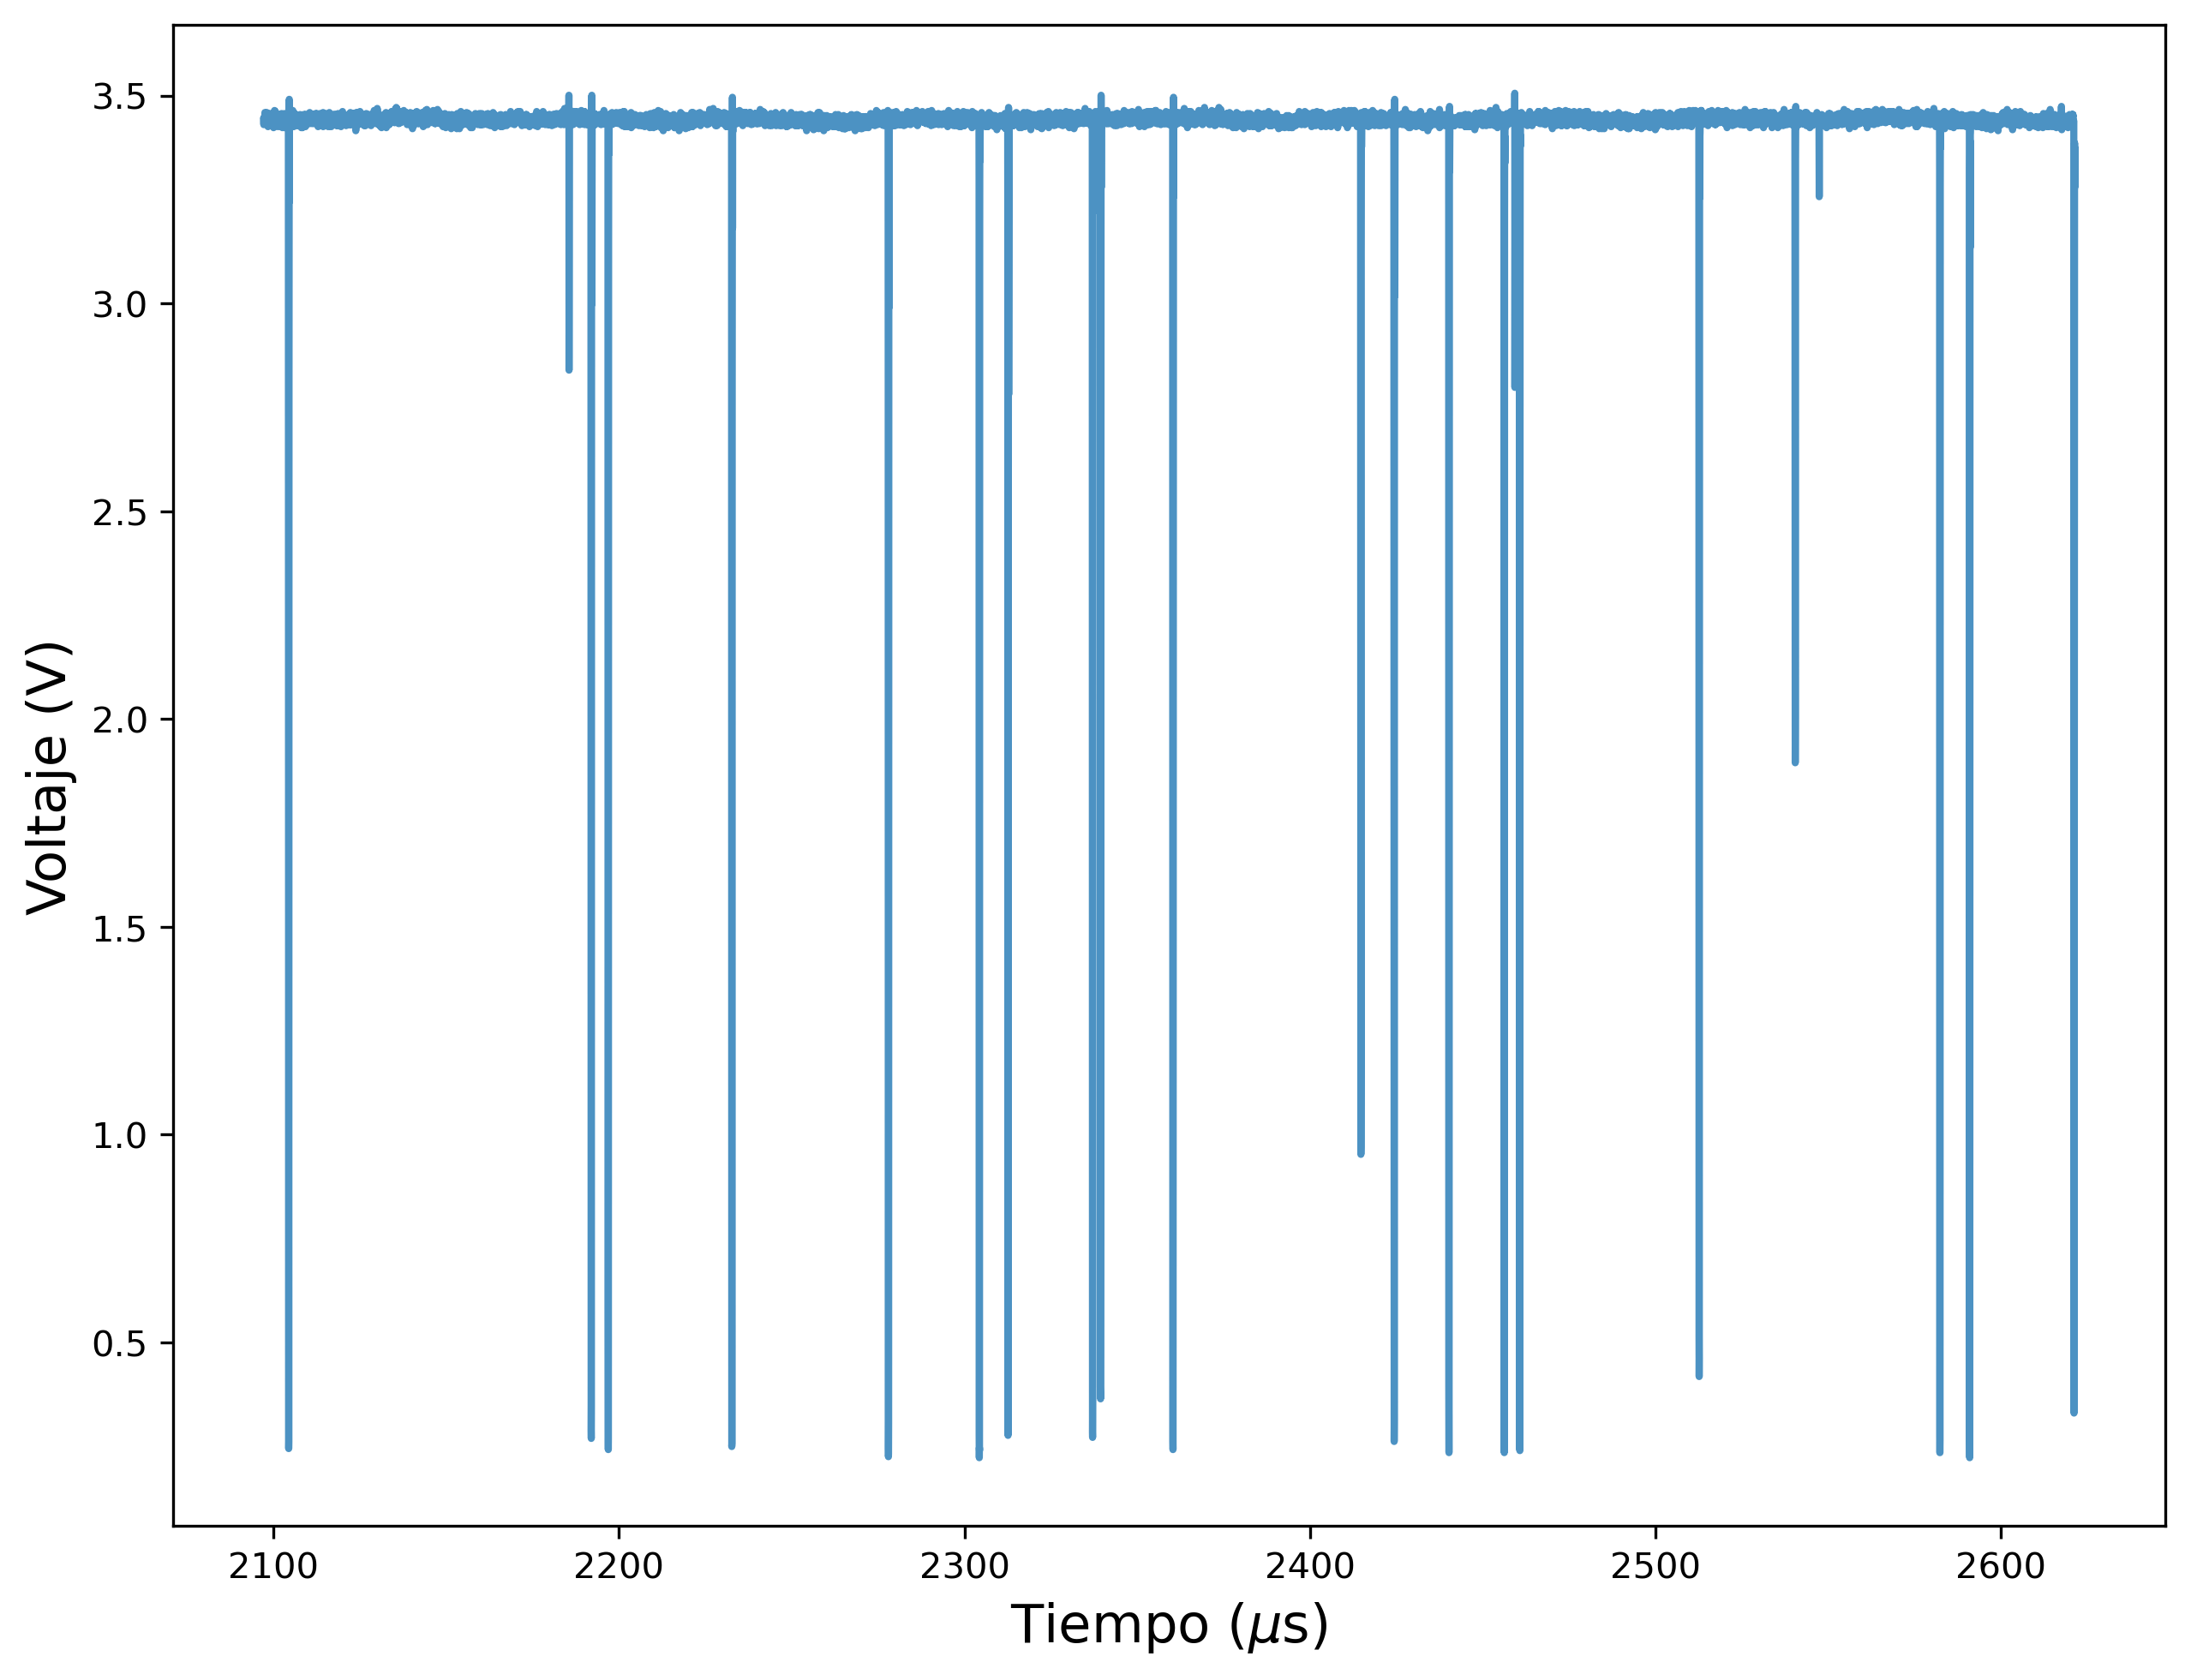

In [129]:
%matplotlib inline

sr = 62.5

fig = plt.figure(figsize=(10,8), dpi=300)
fig.subplots_adjust(bottom=0.15)
i=4
dfp = df.iloc[i*2**14:(i+1)*2**14, :]
dfp_full = df_full.iloc[:10*2**14, :]
plt.plot(dfp.index/sr, dfp.ch1, '-', linewidth=2, alpha=0.8)
#dfp = dfp.iloc[::2, :]

#plt.plot(dfp.index, dfp.ch1, 'o-', linewidth=2, alpha=0.8)

plt.xlabel("Tiempo ($\mu$s)", fontsize=15)
plt.ylabel("Voltaje (V)", fontsize=15)
#plt.savefig('images_tesis/pmt_signal.png')
#plt.savefig('images_tesis/pmt_signal.svg')
plt.show()

# Picos solos

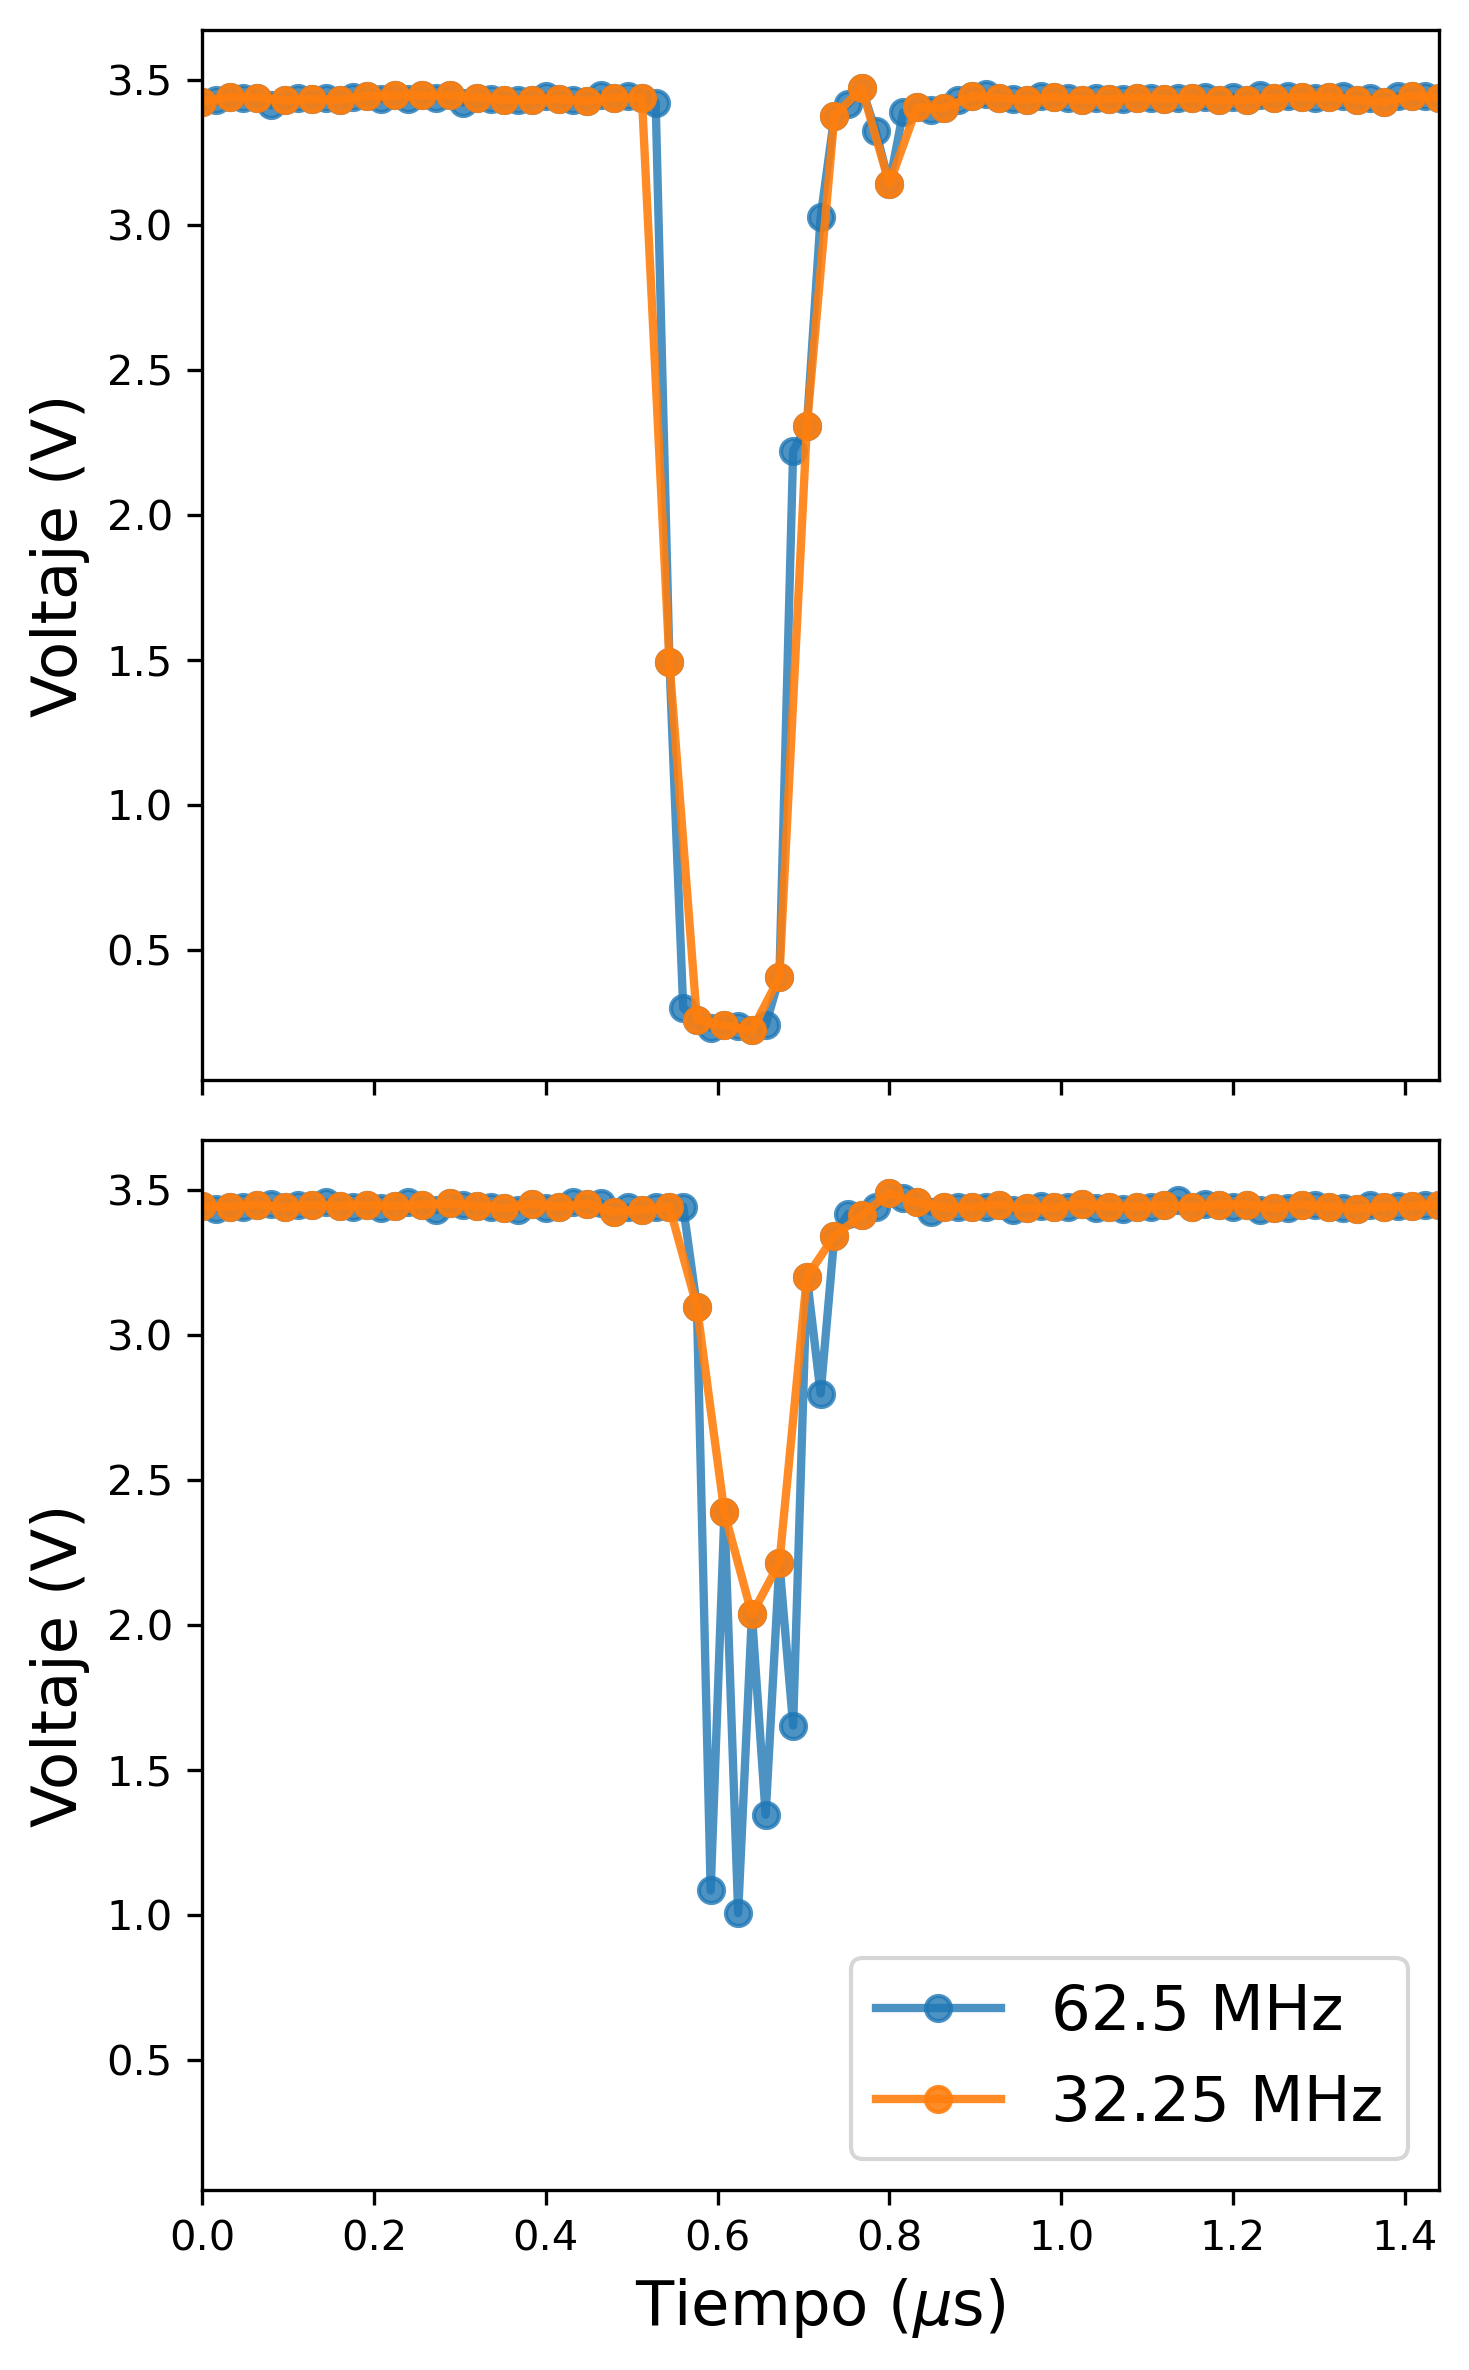

In [62]:
%matplotlib inline
#98760
#98810

#69960
#70050

fig, axs = plt.subplots(2, 1, figsize=(5, 8), sharex=True, dpi=300)
ax1, ax2 = axs

sr1 = 62.5
sr2 = 31.25

t0, tf = 98750/sr1, 98800/sr1
ax1.plot(dfp_full.index/sr1 - t0, dfp_full.ch1, 'o-', linewidth=2, alpha=0.8, color="C0")
ax1.plot(dfp.index/sr1 - t0, dfp.ch1, 'o-', linewidth=2, alpha=0.9, color="C1")

ax1.set_xlim([0, tf - t0])
#ax1.set_xlabel("Tiempo ($\mu$s)", fontsize=15)

t0, tf = 69940/sr1, 70030/sr1
ax2.plot(dfp_full.index/sr1 - t0, dfp_full.ch1, 'o-', linewidth=2, alpha=0.8, color="C0", label="62.5 MHz")
ax2.plot(dfp.index/sr1 - t0, dfp.ch1, 'o-', linewidth=2, alpha=0.9, color="C1", label="32.25 MHz")
ax2.set_ylabel("Voltaje (V)", fontsize=15)

ax2.set_xlim([0, tf - t0])
ax2.set_xlabel("Tiempo ($\mu$s)", fontsize=15)

ax1.set_ylabel("Voltaje (V)", fontsize=15)
plt.tight_layout()
plt.legend(loc="lower right", fontsize=15)
plt.savefig('images_tesis/picos_unicos.png')
plt.savefig('images_tesis/picos_unicos.svg')
plt.show()


# Histogramas de altura y cdf

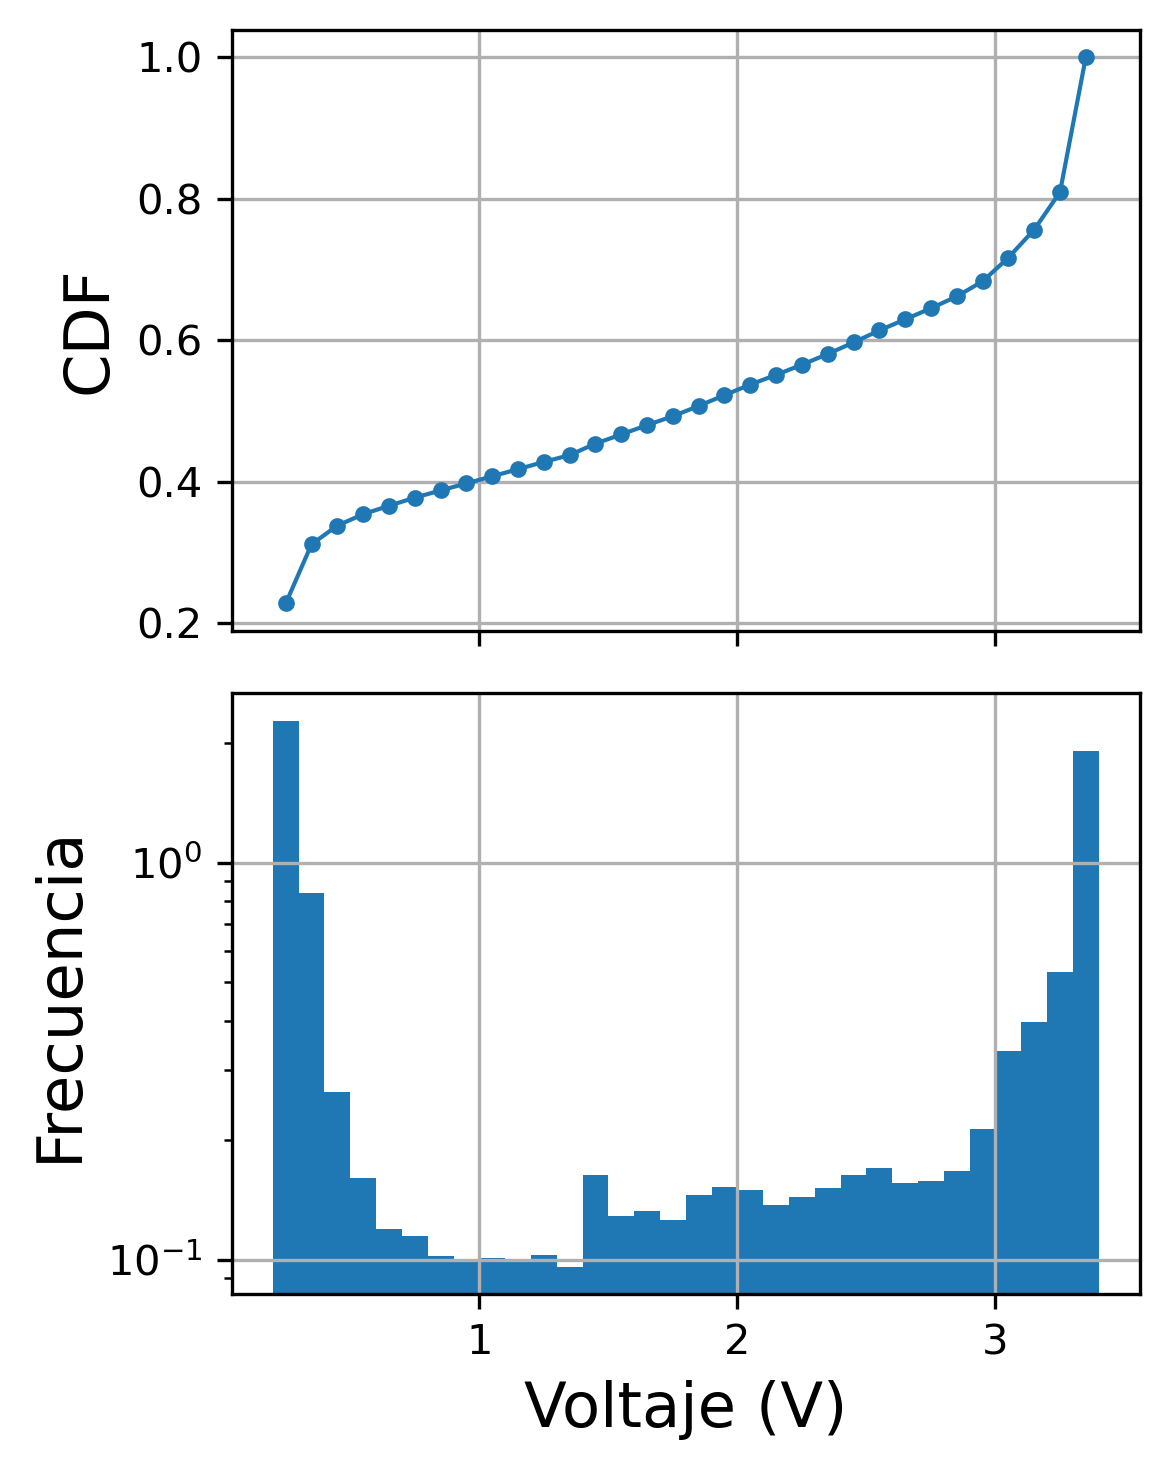

In [78]:

%matplotlib inline

max_voltage = 3.4

df_hist = df["ch1"][df["ch1"] < max_voltage]
bins = np.arange(max_voltage, 0.1, -0.1)[::-1]

freq, bin_edges = np.histogram(df_hist, bins=bins, density=True)

sr = df_hist.attrs["sampling_rate"] * 1e-6
fig, axs = plt.subplots(2, 1, figsize=(4,5), sharex=True, dpi=300)
ax1, ax0 = axs
#ax0.set_title(f"{sr/2} MHz")
ax0.stairs(freq, bin_edges, fill=True)
ax0.set_ylabel("Frecuencia", fontsize=15)
bin_width = (bin_edges[1]-bin_edges[0])
x = np.cumsum(np.diff(bin_edges)) + bin_edges[0] - bin_width/2
ax1.plot(x, np.cumsum(freq)*bin_width, '.-', linewidth=1)
ax1.set_ylabel("CDF", fontsize=15)
ax1.grid()
ax0.grid()
ax0.set_yscale('log')
ax0.set_xlabel("Voltaje (V)", fontsize=15)
plt.tight_layout()
plt.savefig('images_tesis/histograma_puntos.png')
plt.savefig('images_tesis/histograma_puntos.svg')
plt.show()


# Sim picos uniforme

96744.18604651163


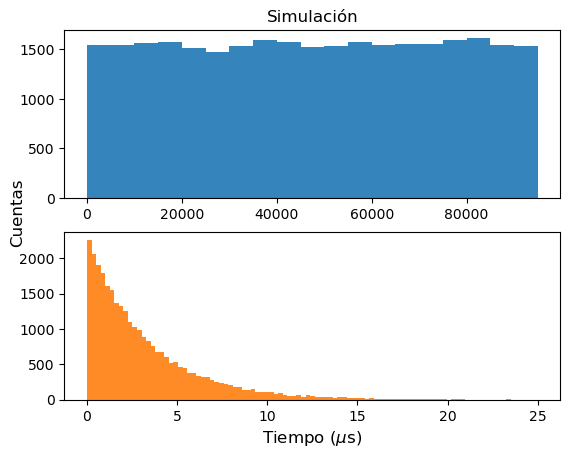

In [213]:
sr = 32.25
print(len(df)/sr)
sample_fot = ss.uniform(scale=len(df)/sr).rvs(30000) 
#time = np.linspace(0, 1, 10000)
#sig = np.ones_like(time) * 3.5
#sig = np.convolve(sig,)
#bins = np.linspace(0, 260e-6, 20)
plt.close('all')
fig, (ax0, ax1) = plt.subplots(2, 1, dpi=100)
bins = np.arange(0, len(df)/sr, 5000) # en us
bin_edges, freq = np.histogram(sample_fot, density=False, bins=bins)
ax0.stairs(bin_edges, freq, fill=True, alpha=0.9)

diff = np.diff(np.sort(sample_fot))
bins = np.linspace(0, 25, 100)
bin_edges, freq = np.histogram(diff, density=False, bins=bins)
ax1.stairs(bin_edges, freq, fill=True, color="C1", alpha=0.9)

ax0.set_title("Simulación", fontsize=12)
ax1.set_xlabel("Tiempo ($\mu$s)", fontsize=12)
fig.text(0.04, 0.5, 'Cuentas', va='center', rotation="vertical", fontsize=12)
#plt.savefig('images_tesis/sim_conteo.png')
#plt.savefig('images_tesis/sim_conteo.svg')
plt.show()


# Sim con poisson

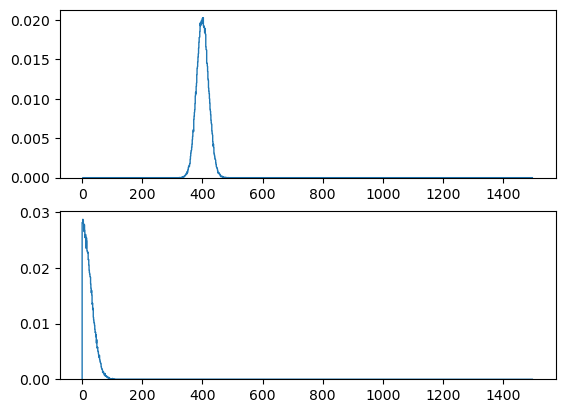

In [141]:

sample_fot = ss.poisson(mu=400).rvs(100000)
#time = np.linspace(0, 1, 10000)
#sig = np.ones_like(time) * 3.5
#sig = np.convolve(sig,)
#bins = np.linspace(0, 260e-6, 20)
bin_size_um = 5000
bins = np.arange(0, 1500, 1)
bin_edges, freq = np.histogram(sample_fot, density=True, bins=bins)
fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.stairs(bin_edges, freq)

diff = np.diff(sample_fot)
bin_edges, freq = np.histogram(diff, density=True, bins=bins)
ax1.stairs(bin_edges, freq)

plt.show()

# Defino funciones para encontrar picos

In [415]:
def find1(df, threshold=0.5):
    return df.iloc[np.where(np.diff(df.ch1) > threshold)[0]]

def find2(df, threshold=-0.5):
    return df.iloc[np.where(np.diff(df.ch1) < threshold)[0]]

def find3(df: pd.DataFrame, threshold=1.0):
    dbin = (df.ch1 < threshold)*1
    return df.iloc[np.where(np.diff(dbin) > 0)[0]]

def find4(df: pd.DataFrame, threshold=1.0):
    dbin = (df.ch1 < threshold)*1
    return df.iloc[np.where(np.diff(dbin) < 0)[0]]

def find5(df: pd.DataFrame, threshold=1.0, nsmooth=10):
    dbin = (df.ch1 < threshold)*1
    Devents = np.diff(dbin) > 0
    Dsmooth = np.convolve(Devents,np.ones(nsmooth),mode='same')
    Dbin = Dsmooth > 1/nsmooth
    Ddiff= np.diff(Dbin.astype(int))
    Devents=Ddiff>0
    print(Devents)
    return df.iloc[2:,:].iloc[Devents,:]

def find6(df, threshold=-1.0, max_samples=15):
    df = find2(df, threshold=threshold)
    return df.iloc[np.where(np.abs(np.diff(df.index)) > max_samples)[0], :]

def find7(df, threshold_s=0.8, threshold_d=1.0, max_samples=0):
    df = find4(df, threshold=threshold_d)
    return df.iloc[np.where(np.abs(np.diff(df.index)) > max_samples)]

def find8(df, threshold=1.0, max_samples=0):
    dbin = np.where(df.ch1 < threshold, 0, 1)
    df = df.iloc[np.where(np.diff(dbin) < 0)[0]]
    return df.iloc[np.where(np.abs(np.diff(df.index)) > max_samples)]

def find_peaks_god(data,thres=0.5,nsmooth=10):
    Dbin = data > thres
    Ddiff= np.diff(Dbin.astype(int))
    Devents=Ddiff>0
    # soften peaks
    Dsmooth = np.convolve(Devents,np.ones(nsmooth),mode='valid')
    Dbin = Dsmooth > 1/nsmooth
    Ddiff= np.diff(Dbin.astype(int))
    Devents=Ddiff>0
    peaksnumber = np.sum(Devents)
    return peaksnumber

def find_peaks_god2(df, thres=1.0, nsmooth=10):
    pass

def plot_analisis(df, func, pct=0.1, **kwargs):
    plt.figure(figsize=(10,5))
    df_plot = df.iloc[:int(len(df)*pct), :]
    plt.plot(df_plot.index, df_plot.ch1, '.-')
    plt.plot(df_plot.index[1:], np.diff(df_plot.ch1), '.-')
    diff_antes = np.diff(df_plot.ch1)
    df = func(df, **kwargs)
    df_plot = func(df_plot, **kwargs)
    #plt.plot(df_plot.index, diff_antes[df_plot.index], '.-')
    plt.plot(df_plot.index, df_plot.ch1, 'o', color="k")
    plt.plot(df_plot.index +1 , diff_antes[df_plot.index], 'o', color="gray")
    return df

# Hago el analisis

In [264]:
%matplotlib tk
from functools import partial

def analisis(df, func, plot=True, **kwargs):
    if plot:
        data = plot_analisis(df, func)
    else:
        data = func(df)
    sample_fot = data.index
    sr = 32.25 #MHz
    bin_size_um = 5000
    sample_fot = sample_fot/sr

    bins = np.arange(0, len(df)/sr, bin_size_um)
    bin_edges, freq = np.histogram(sample_fot, density=True, bins=bins)
    fig, (ax0, ax1) = plt.subplots(2, 1)
    ax0.stairs(bin_edges, freq, fill=True, label=len(sample_fot))
    ax0.legend()

    diff = np.diff(sample_fot)

    bins = np.linspace(0, 200, 100)
    bin_edges, freq = np.histogram(diff, density=False, bins=bins)
    ax1.stairs(bin_edges, freq, color="C1", fill=True, **kwargs)
    ax1.legend()

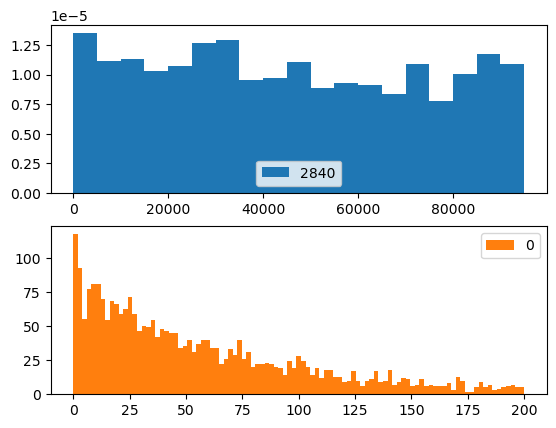

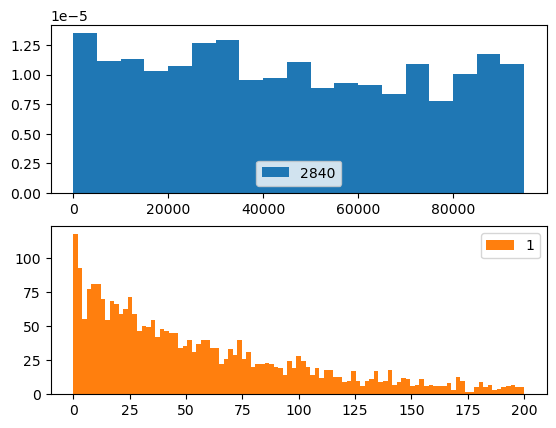

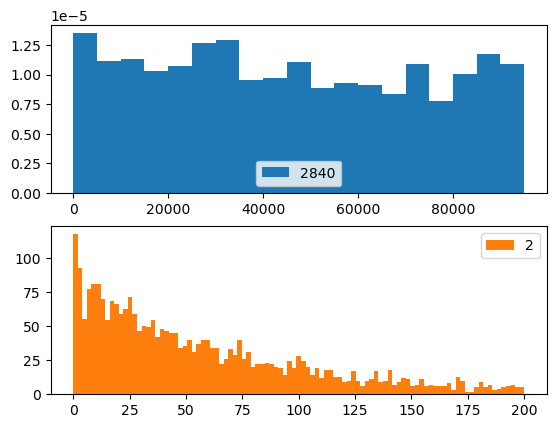

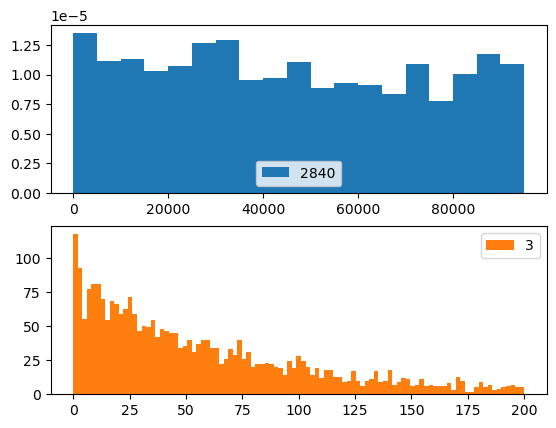

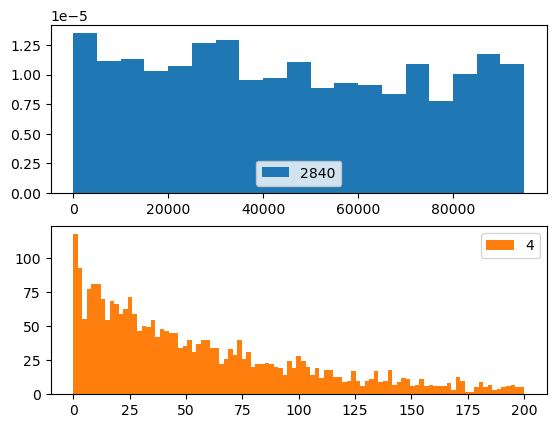

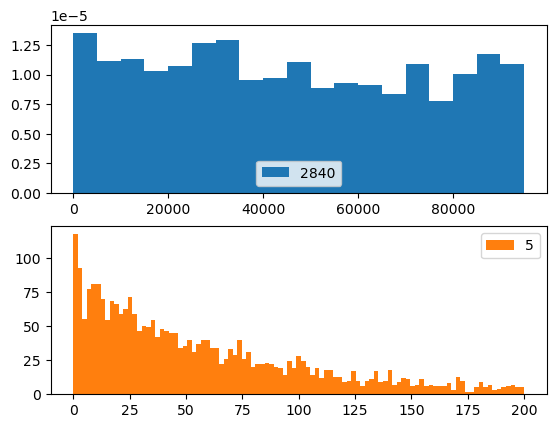

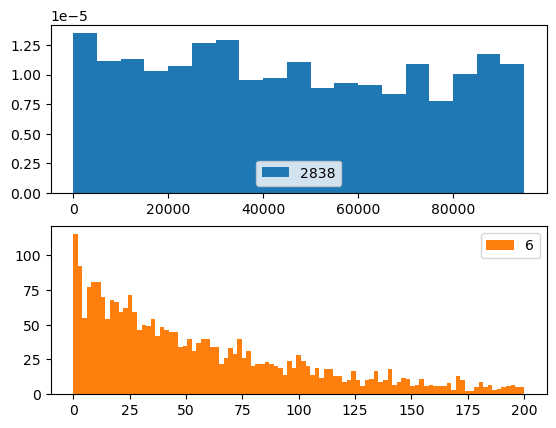

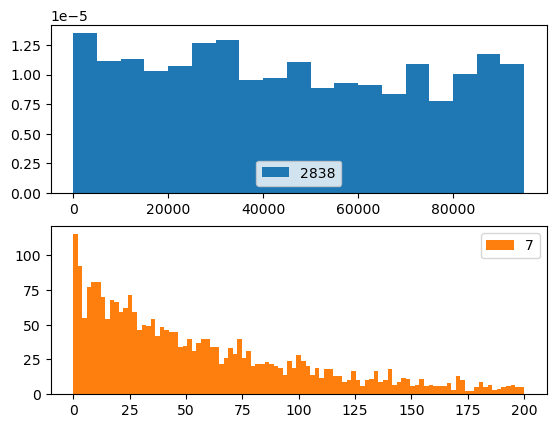

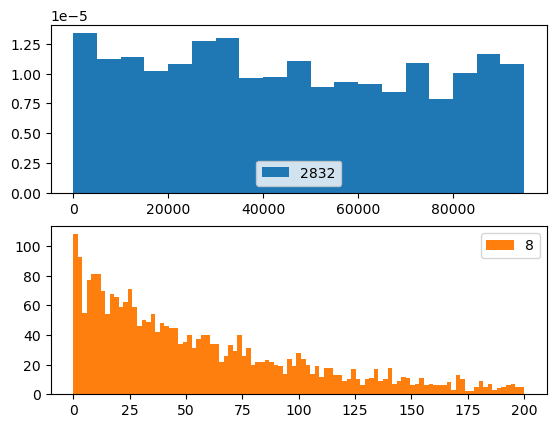

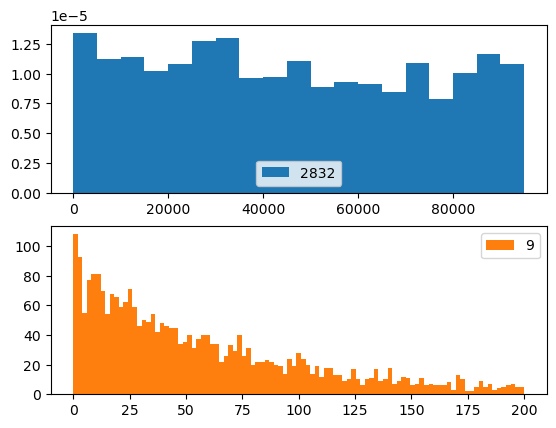

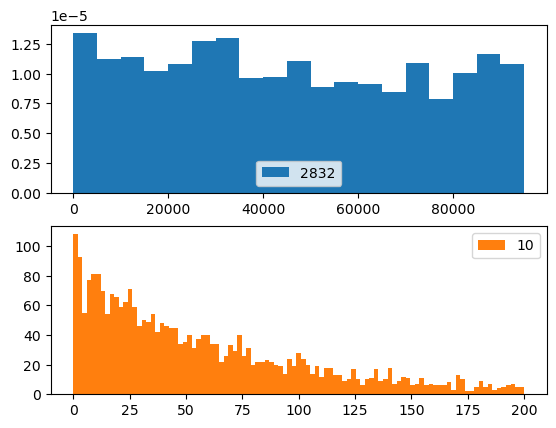

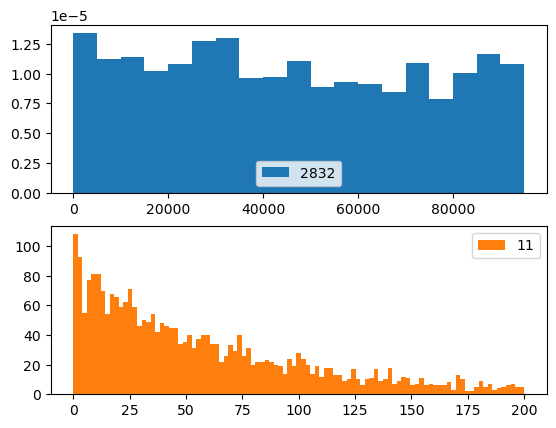

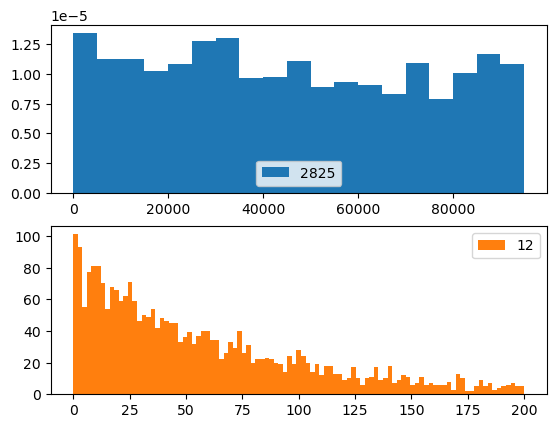

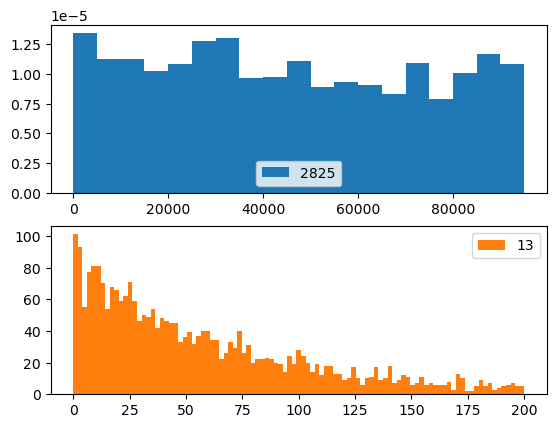

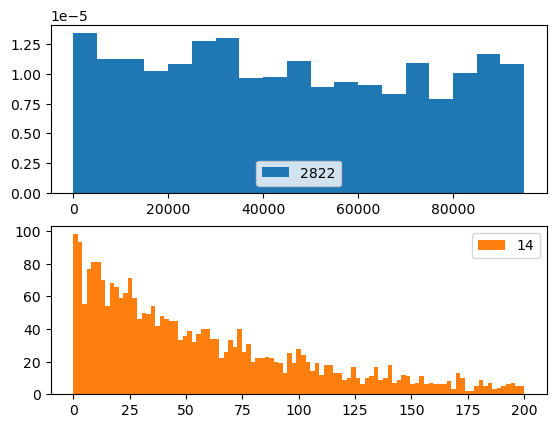

In [265]:
%matplotlib inline
for mx in range(0, 15, 1):
    f = partial(find7, max_samples=mx)
    analisis(df, f, plot=False, label=mx)

# AUTOCORRELACIONES

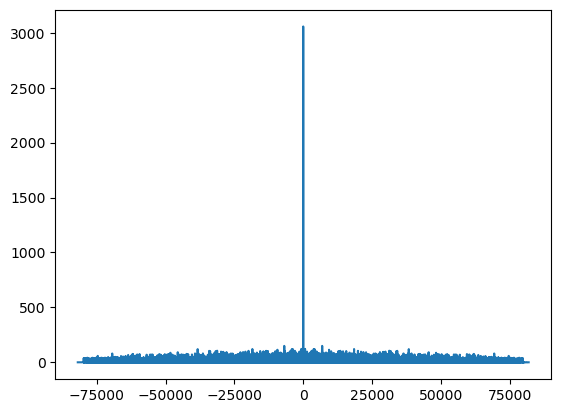

In [131]:

screen_size = 5*2**14
autocorrs = []
vars = []
for i in range(19*2):
    screen = df.iloc[i*screen_size:(i+1)*screen_size]
    sig = screen.ch1 - np.median(screen.ch1)
    var = np.var(screen.ch1)
    vars.append(var)
    autocorr = np.correlate(sig, sig, mode="full")
    autocorrs.append(autocorr/(var*len(screen.ch1)))

lags = np.arange(-screen_size + 1, screen_size, 1)
plt.plot(lags, autocorr)
plt.show()

0.1127674799626409


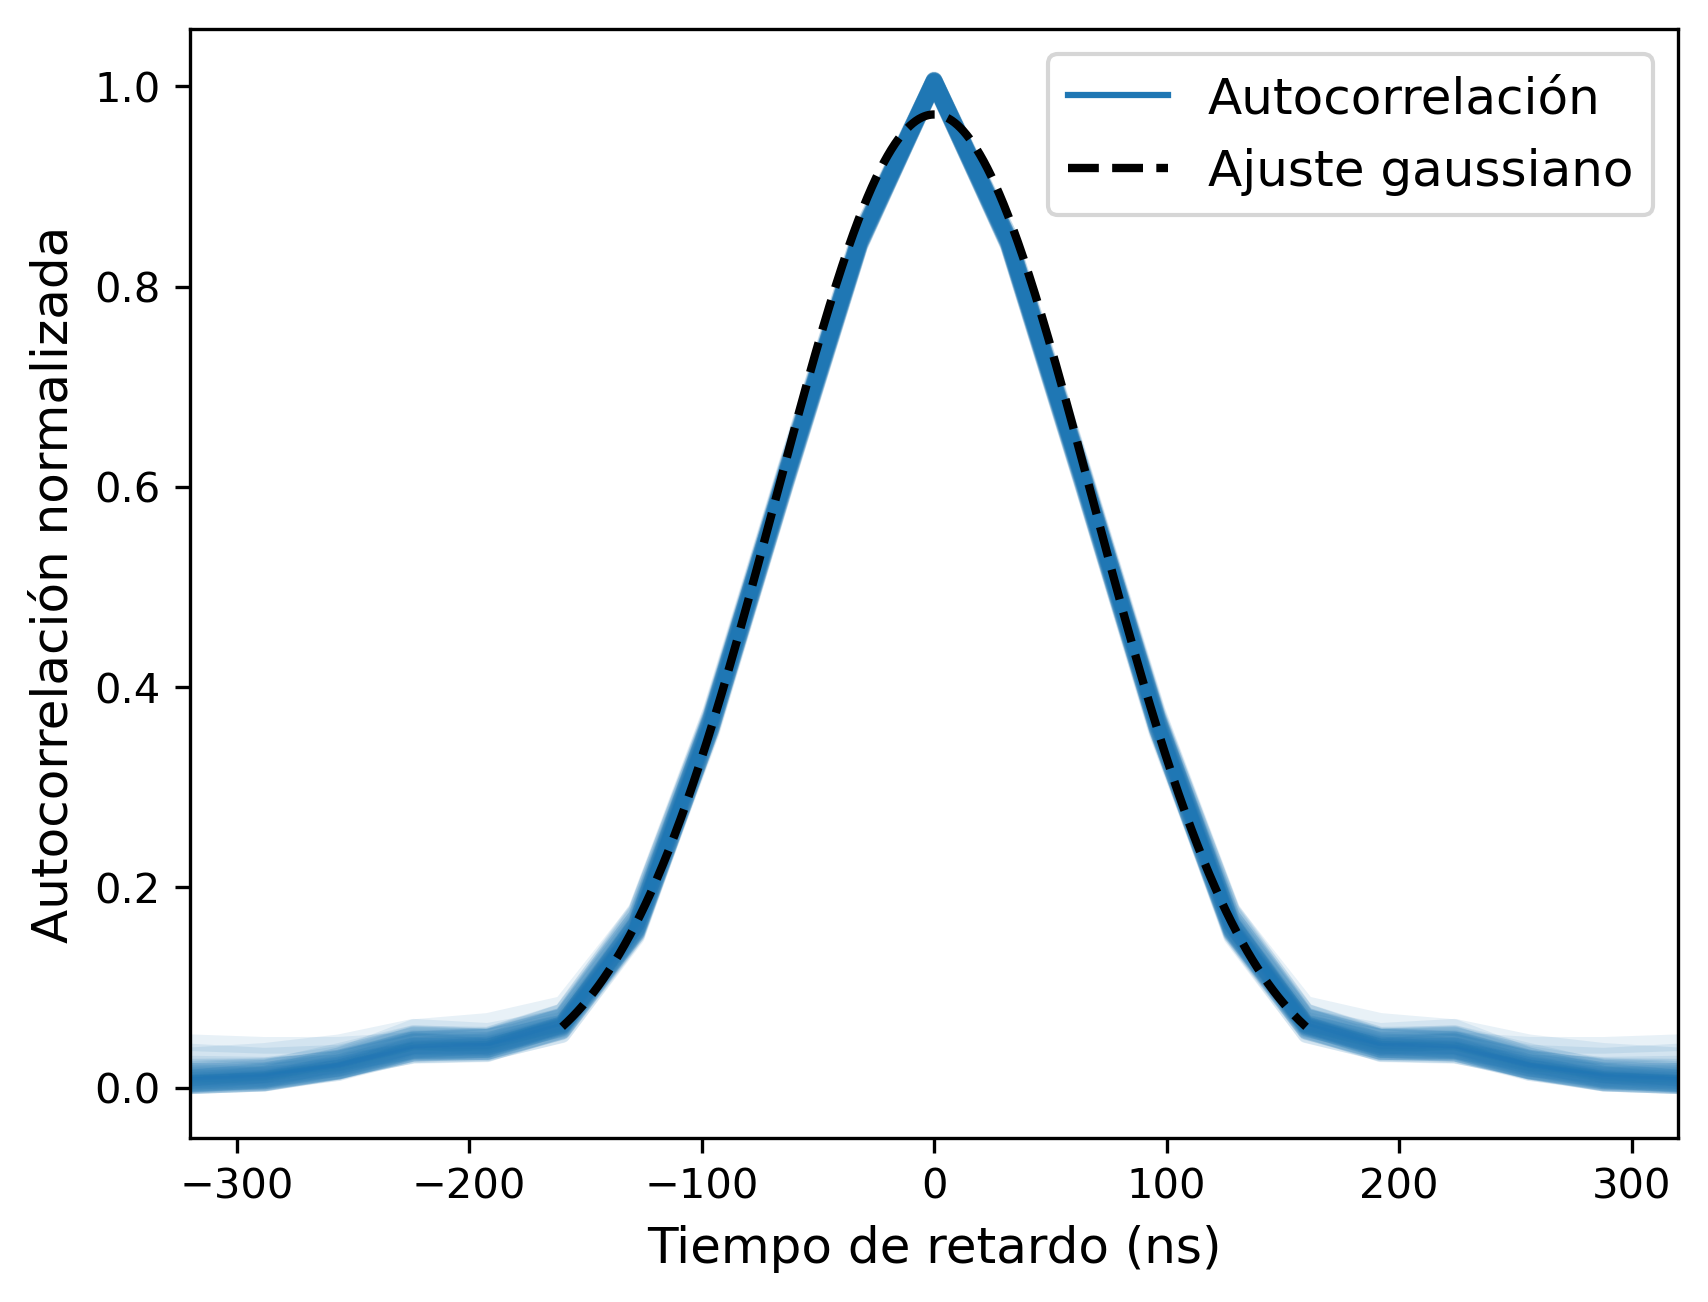

38


In [200]:
from scipy.optimize import curve_fit

def gaussian(x, a=1, mu=0, sigma=4):
    return a*ss.norm.pdf(x, loc=mu, scale=sigma)

fwhms = []
plt.figure(dpi=300)
for autocorr in autocorrs:

    #dtpts = len(autocorr)//2
    #lags = np.arange(-dtpts -1, dtpts, 1)
    #atcrr = autocorr / ((len(autocorr)//2) * np.var(screen.ch1))
    lags = np.arange(len(autocorr)) - len(autocorr) // 2

    


    #fit_indexes = np.where(np.logical_and(lags > -6, lags < 6))[0]
    #lags_fit = lags[fit_indexes]
    #atcrr_fit = autocorr[fit_indexes]
    
    filter = np.where(np.logical_and(lags < 6, lags > -6))[0]
    lags_fit = lags[filter]
    autocorr_fit = autocorr[filter]
    popt, pcov = curve_fit(gaussian, lags_fit, autocorr_fit, p0=[1, 0, 4])


    filter_plot =  np.where(np.logical_and(lags < 21, lags > -21))[0]
    lags_plot = lags[filter_plot]
    autocorr_plot = autocorr[filter_plot]
    plt.plot(1000*lags_plot / 31.25, autocorr_plot, linewidth=4, alpha=0.1, color="C0")

    x = np.linspace(-5, 5, 1000)
    a, mu, sigma = popt
    fwhm = 2 * np.sqrt(2 * np.log(2)) * sigma / np.sqrt(2)
    fwhms.append(fwhm)

plt.plot([2000, 2001], [0, 0], label="Autocorrelación")
plt.plot(1000*x / 31.25, gaussian(x, *popt), linestyle="dashed", linewidth=2, color="black", label="Ajuste gaussiano")

plt.xlim([-1000*10/31.25, 1000*10/31.25])
print(np.mean(fwhms)/31.25)
fwhms = np.array(fwhms) / 31.25
fwhms = fwhms *1000
plt.xlabel("Tiempo de retardo (ns)", fontsize=12)
plt.ylabel("Autocorrelación normalizada", fontsize=12)
plt.legend(fontsize=12, loc="upper right")
plt.savefig('images_tesis/autocorr_gauss.png')
plt.savefig('images_tesis/autocorr_gauss.svg')
plt.show()
print(len(autocorrs))

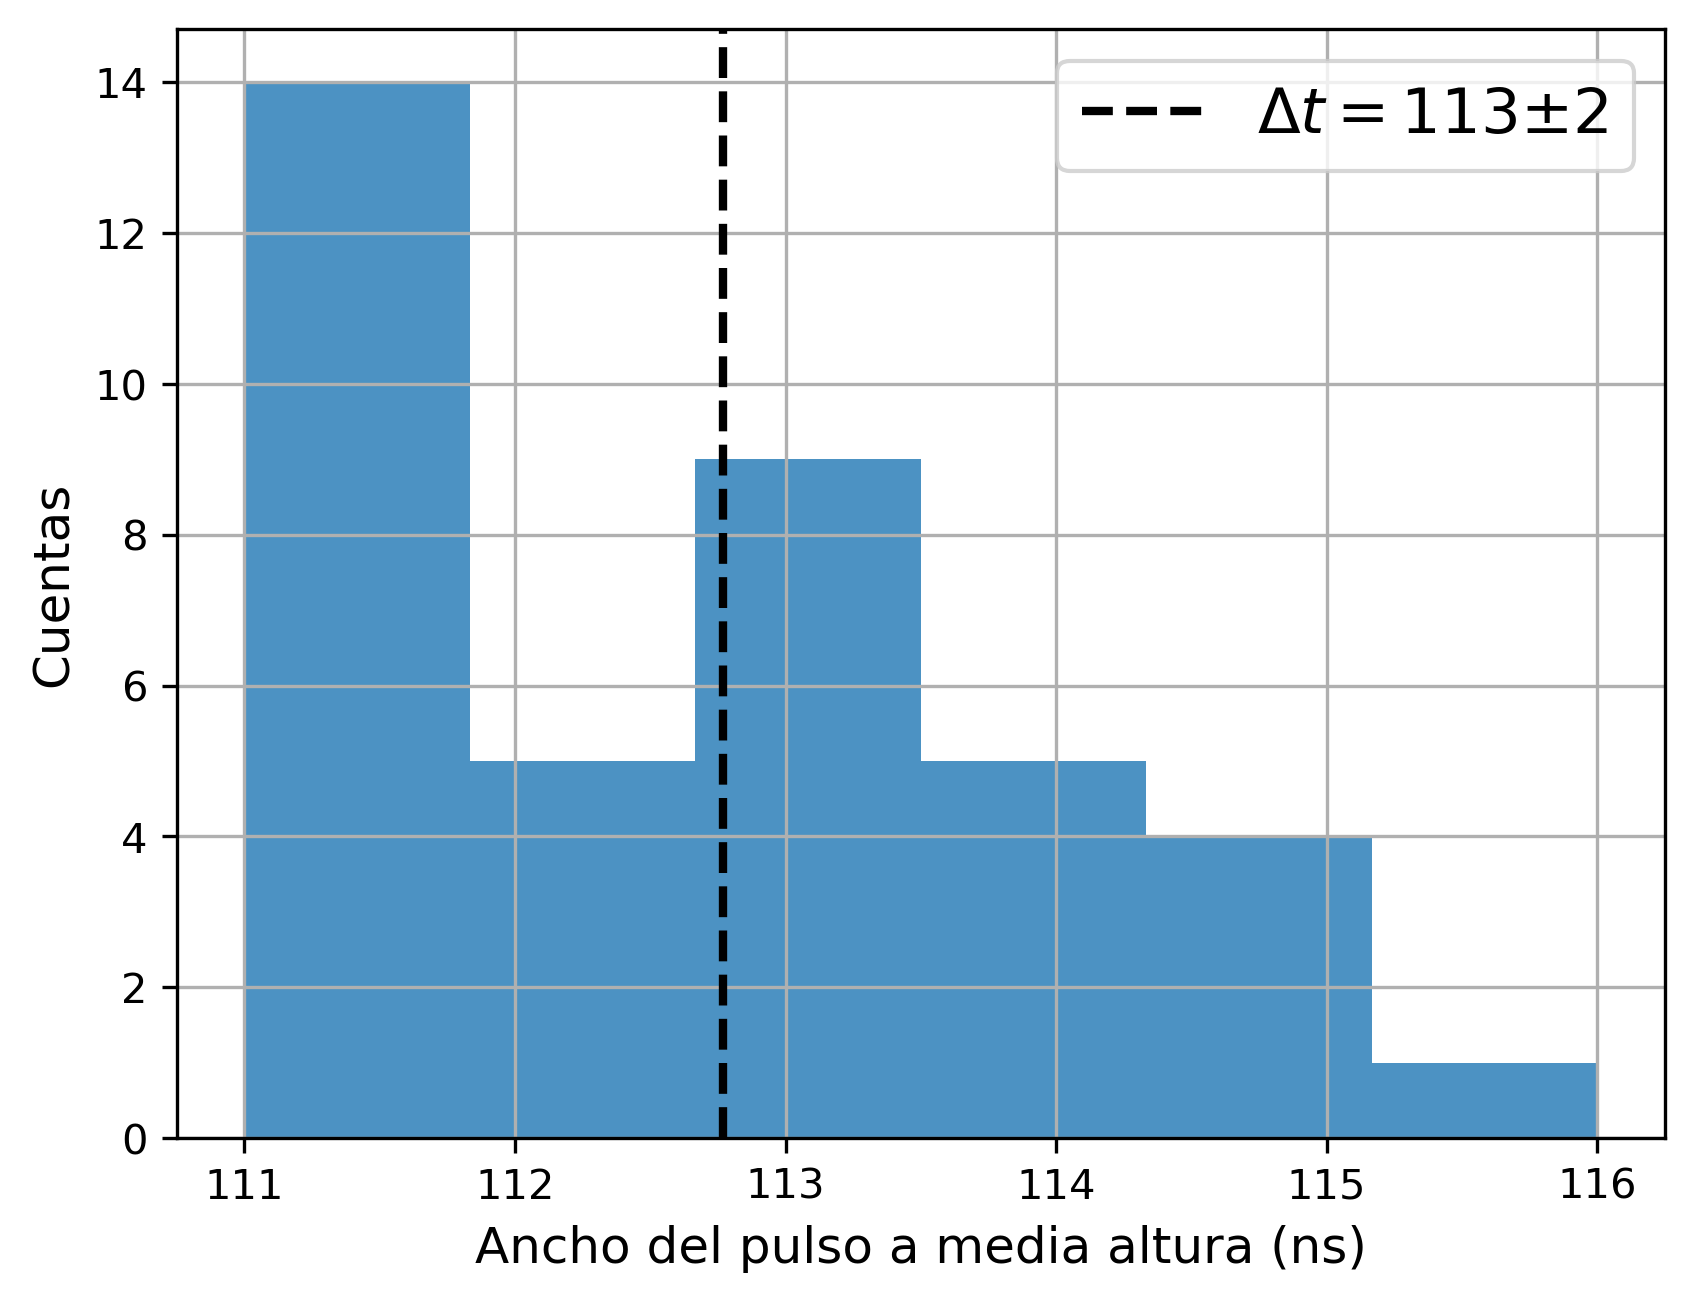

In [201]:

bins = np.linspace(111, 116, 7)
#freq, bin_edges = np.histogram(fwhms, )
plt.figure(dpi=300)
plt.grid()
plt.hist(fwhms, bins=bins, alpha=0.8)
plt.xlabel("Ancho del pulso a media altura (ns)", fontsize=12)
plt.ylabel("Cuentas", fontsize=12)
label = "$\Delta t =$" + f"{np.mean(fwhms):.0f}" + "$\pm$" + f"{2*np.std(fwhms):.0f}"
plt.axvline(np.mean(fwhms), linestyle="dashed", linewidth=2, color="k", label=label)
plt.legend(fontsize=15, loc="upper right")

plt.savefig('images_tesis/hist_anchos.png')
plt.savefig('images_tesis/hist_anchos.svg')
plt.show()

# ANALISIS ESTADISDTICO

96744.18604651163
3.224732901488694 3.224913698673677
len(df)/sr/1000=96.74418604651163
43.368530976240876
65.17076890356982


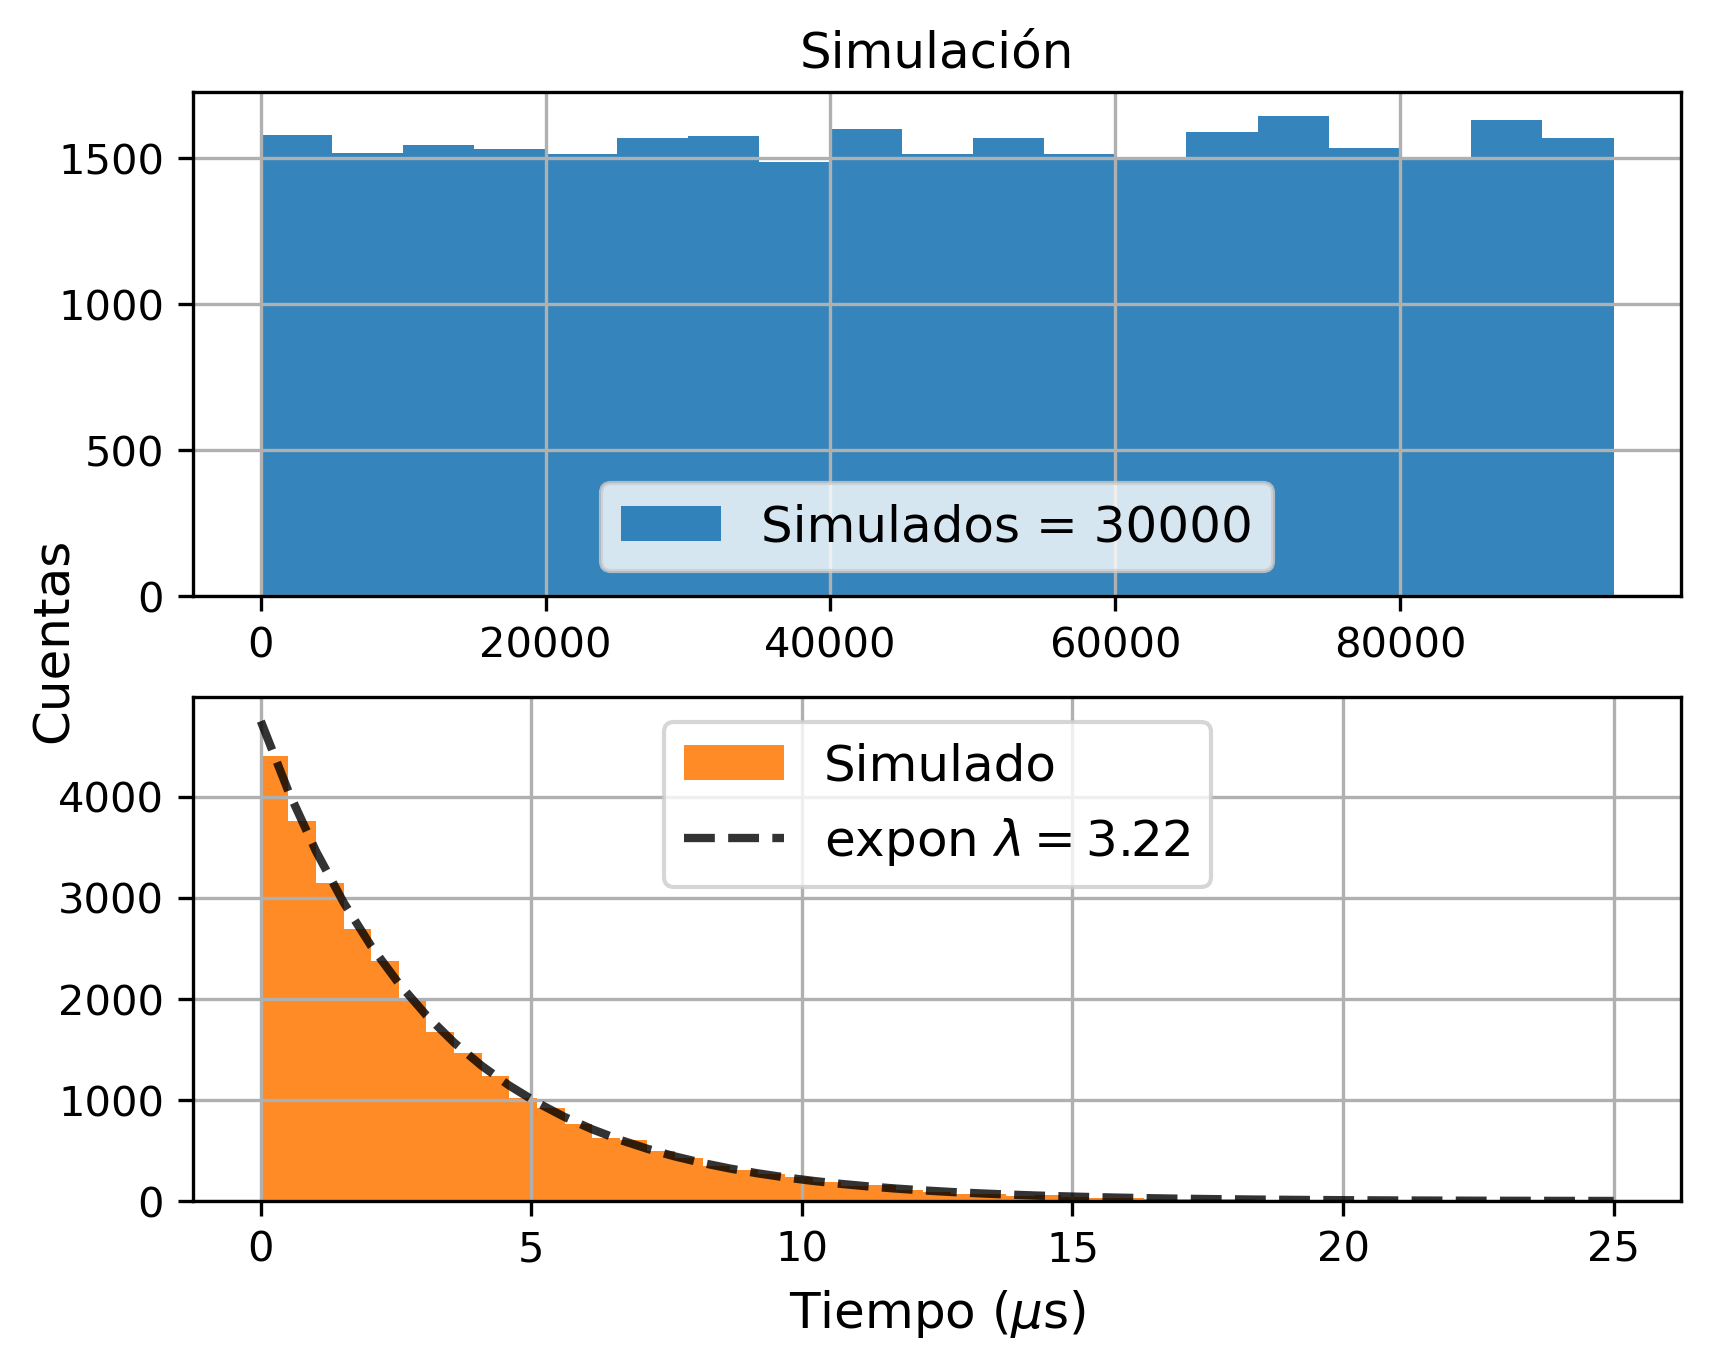

In [382]:
import scipy.stats as ss

sr = 32.25

print(len(df)/sr)
sample_fot = ss.uniform(scale=len(df)/sr).rvs(30000) 
#time = np.linspace(0, 1, 10000)
#sig = np.ones_like(time) * 3.5
#sig = np.convolve(sig,)
#bins = np.linspace(0, 260e-6, 20)
plt.close('all')
fig, (ax0, ax1) = plt.subplots(2, 1, dpi=300)
bins = np.arange(0, len(df)/sr, 5000) # en us
freq1, bin_edges = np.histogram(sample_fot, density=False, bins=bins)
freq = freq1
ax0.stairs(freq, bin_edges, fill=True, alpha=0.9, label=f"Simulados = {len(sample_fot)}")

diff = np.diff(np.sort(sample_fot))
bins = np.linspace(0, 25, 50)
freq, bin_edges = np.histogram(diff, density=False, bins=bins)
bin_width = bin_edges[1] - bin_edges[0]
ax1.stairs(freq, bin_edges, fill=True, color="C1", alpha=0.9, label="Simulado")

ax0.set_title("Simulación", fontsize=12)
ax1.set_xlabel("Tiempo ($\mu$s)", fontsize=12)
fig.text(0.04, 0.5, 'Cuentas', va='center', rotation="vertical", fontsize=12)
rv = ss.expon(scale=np.mean(diff)) 
label = "expon $\lambda =$" + f"{np.mean(diff):.2f}"
ax1.plot(bins, rv.pdf(bins) * len(diff) * bin_width, linewidth=2, alpha=0.8, color="k", linestyle="dashed", label=label)


print(np.mean(diff), (len(df)/sr)/len(diff))
print(f"{len(df)/sr/1000=}")
Ei = (rv.cdf(bin_edges[1:]) - rv.cdf(bin_edges[1:] - bin_width)) * len(diff)#/ bin_width
chisq = np.sum((freq - Ei)**2/Ei)
print(chisq)
print(ss.chi2.ppf(1 - 0.05, len(bins)-2))
#ax1.plot(bin_edges[1:] - bin_width, Ei, '.', color="k")
ax1.legend(loc="upper center", fontsize=12)
ax0.legend(fontsize=12)
ax1.grid()
ax0.grid()

plt.savefig('images_tesis/sim_conteo.png')
plt.savefig('images_tesis/sim_conteo.svg')

plt.show()

99840.0
6240000
np.mean(diff)=np.float64(31.018573826546476)
225.73186347401202
65.17076890356982


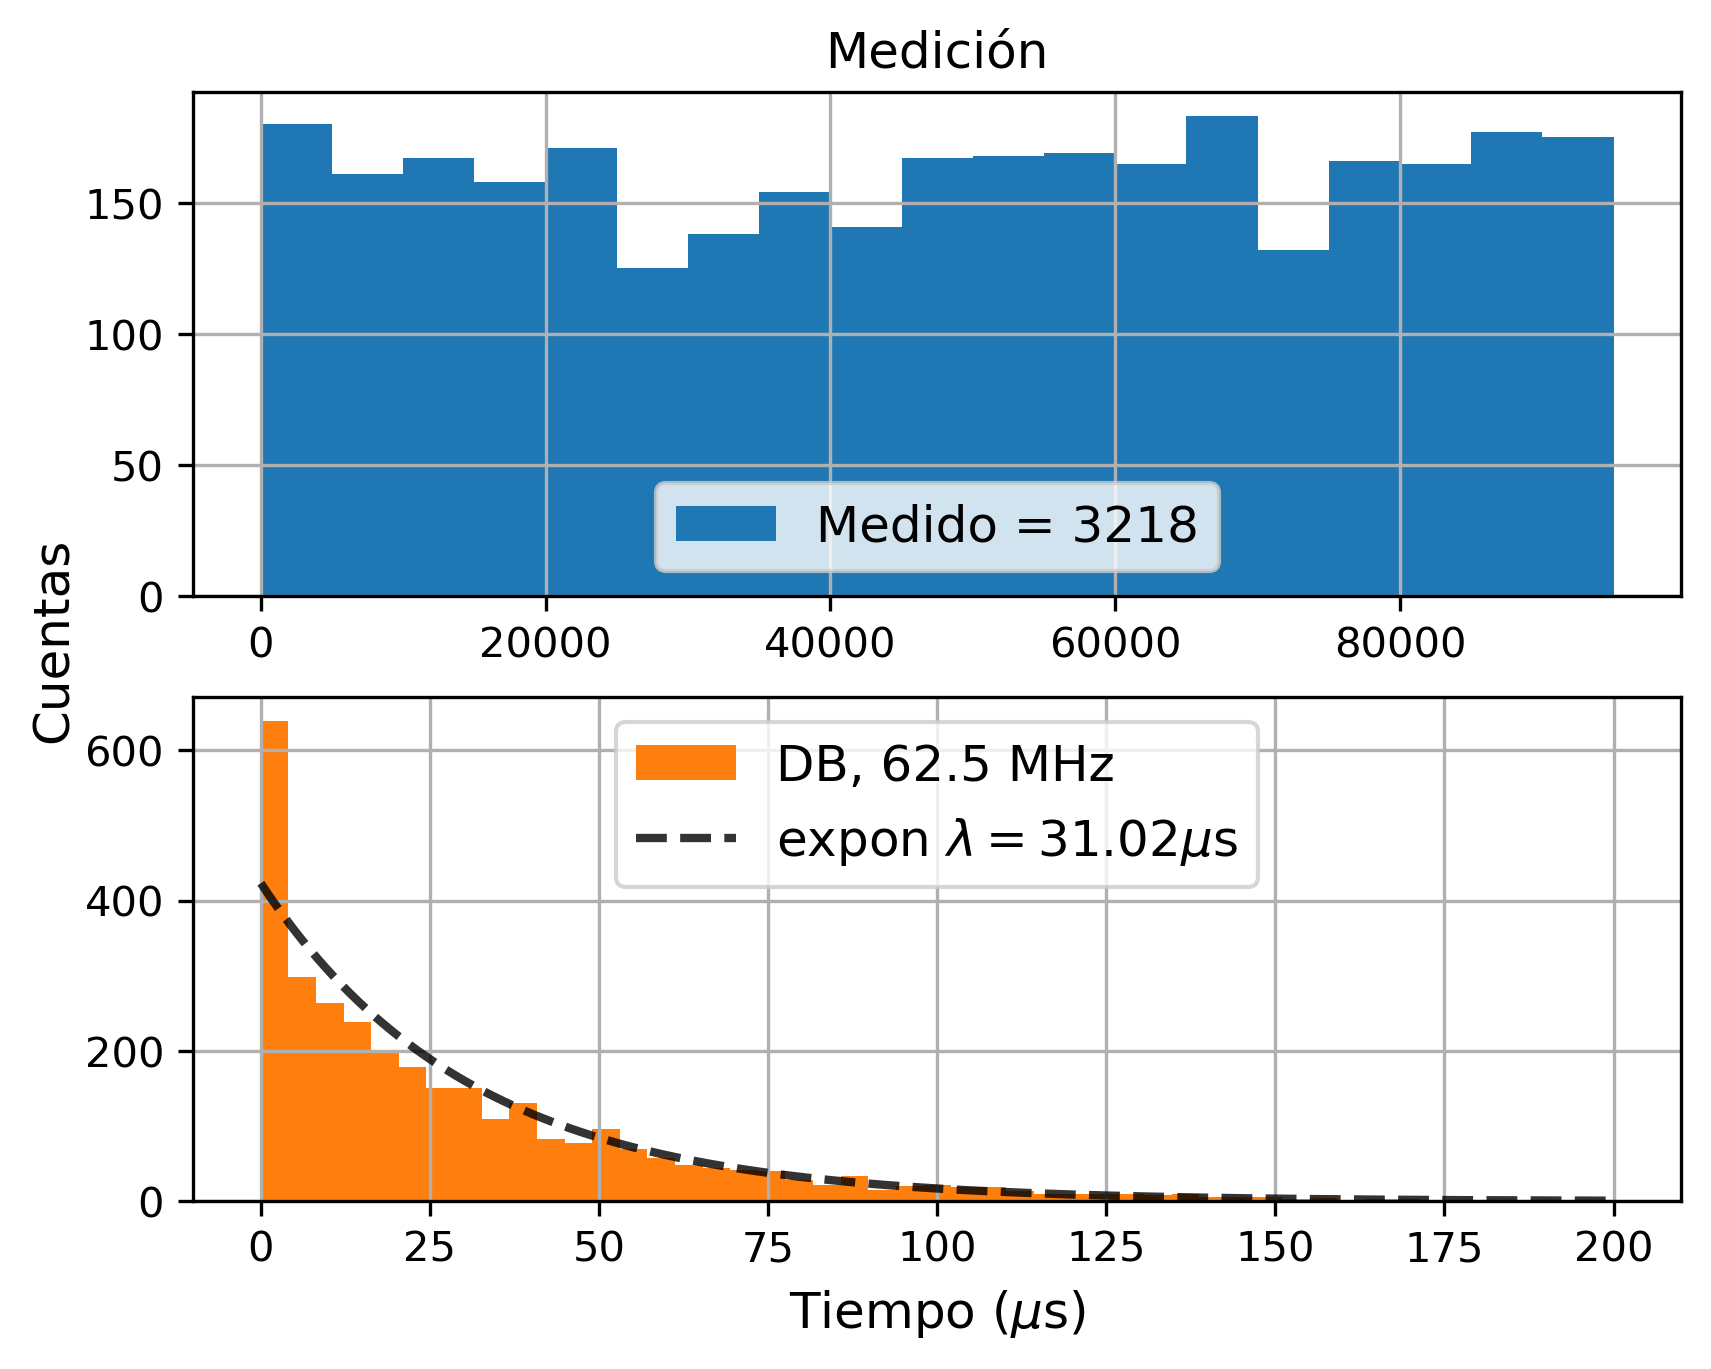

In [555]:
from functools import partial

def analisis_chi2(df, func, plot=True, sr=31.25,**kwargs):
    if plot:
        data = plot_analisis(df, func)
    else:
        data = func(df)
    sample_fot = data.index
    #sr = 31.25 #MHz
    #sr = 62.5
    bin_size_um = 5000
    sample_fot = sample_fot/62.5

    print(len(df))
    if sr == 31.25:
        tmax = len(df)/sr
    elif sr == 62.5:
        tmax = len(df)/sr
    else:
        raise ValueError

    bins = np.arange(0, tmax, bin_size_um)
    freq, bin_edges = np.histogram(sample_fot, density=False, bins=bins)
    fig, (ax0, ax1) = plt.subplots(2, 1, dpi=300)
    ax0.stairs(freq, bin_edges, fill=True, label=f"Medido = {len(sample_fot)}")
    #ax0.legend()

    diff = np.diff(sample_fot)
    print(f"{np.mean(diff)=}")

    bins = np.linspace(0, 200, 50)
    freq, bin_edges = np.histogram(diff, density=False, bins=bins)
    bin_width = bin_edges[1] - bin_edges[0]
    ax1.stairs(freq, bin_edges, color="C1", fill=True, label="DB, 62.5 MHz", **kwargs)
    #ax1.legend()

    # chi2
    rv = ss.expon(scale=np.mean(diff))
    Ei = (rv.cdf(bin_edges[1:]) - rv.cdf(bin_edges[1:] - bin_width)) * len(diff)# /bin_width #+ np.abs(ss.norm(loc=0, scale=0.005).rvs(len(bin_edges[1:])))
    chisq = np.sum((freq - Ei)**2/Ei)
    x = np.linspace(0, bin_edges[-1], 1000)
    label = "expon $\lambda =$" + f"{np.mean(diff):.2f}" + "$\mu$s"
    ax1.plot(x, ss.expon.pdf(x, scale=np.mean(diff)) * len(diff) * bin_width, linestyle="dashed", color="k", linewidth=2, alpha=0.8, label=label)
    ax1.grid()
    ax0.grid()
    ax1.legend(loc="upper center", fontsize=12)
    #ax1.plot(bin_edges[:-1] + bin_width/2, Ei, '.', color="k")
    fig.text(0.04, 0.5, 'Cuentas', va='center', rotation="vertical", fontsize=12)
    ax1.set_xlabel('Tiempo ($\mu$s)', fontsize=12)
    ax0.legend(loc="lower center", fontsize=12)
    #ax1.set_yscale('log')
    ax0.set_title("Medición")
    
    #plt.savefig('images_tesis/med_conteo_db62.png')
    #plt.savefig('images_tesis/med_conteo_db62.svg')
    print(chisq)
    print(ss.chi2.ppf(1 - 0.05, len(bins)-2))

print(len(df_full)/62.5)
analisis_chi2(df_full, find7, sr=62.5,plot=False)
# find2 5687.7190550232635
# find7 48.6
# find7_62 486
# chic 65.17

In [416]:
import time

functions = [find7, find2, find8]

reps = 1000
perfs = []
for fun in functions:
    perf = []
    for rep in range(reps):
        t0 = time.perf_counter()
        fun(df)
        tf = time.perf_counter()
        perf.append(tf - t0)
    perfs.append(perf)

In [417]:
for perf in perfs:
    print(np.mean(perf), "+-", np.std(perf))

0.011176340810750845 +- 0.0011262793388254458
0.0038810776730824727 +- 0.0007509603290180172
0.011074544328803313 +- 0.0010255066988129028


9019.074257613594


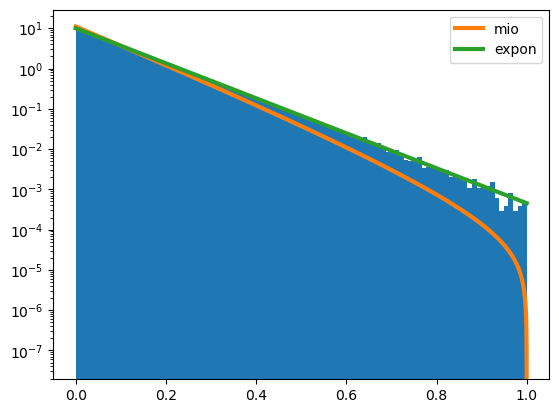

In [517]:
dt = 0.0001
R = 10
T = 1

def pdf(tau, dt, R, T):
    return R * (T - tau)*(1 - R*dt)**(tau/dt - 2)

tau = np.arange(0, 1+dt, dt)

norm = np.sum(pdf(tau, dt, R, T))
print(norm)


t_medido = 100000*T
sample = ss.uniform(loc=0, scale=t_medido).rvs(int(R * t_medido / T))
#np.sort(sample)
diff = np.diff(np.sort(sample))

bins = 100
bin_width = T/bins
plt.hist(diff, density=True, bins=np.linspace(0, T, bins))
plt.plot(tau, pdf(tau, dt, R, T)/(norm*dt), linewidth=3, label="mio")
plt.plot(tau, ss.expon(scale=np.mean(diff)).pdf(tau), linewidth=3, label="expon")
#plt.xlim([0, 1])
plt.yscale('log')
plt.legend()
plt.show()